In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors

In [16]:
disc_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_disc_pred-opt_modular_part2_raw.npy')
gen_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_modular_part2_raw.npy')
real = np.load('/user/home/al18709/work/gan_predictions_20/validation_real-opt_modular_part2_raw.npy')
# disc_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_disc_pred-opt_modular_part2_patchloss_raw.npy')
# gen_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_modular_part2_patchloss_raw.npy')

inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/valid_X.npy')

In [3]:
print(disc_pred.shape)
print(inputs.shape)

(15930, 1, 20)
(15930, 6)


In [4]:
print(disc_pred[10,0,2])

-25.581884384155273


/tmp/ipykernel_40969/690741997.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(disc_pred[:,0,0], shade=True, color="#3E579C")


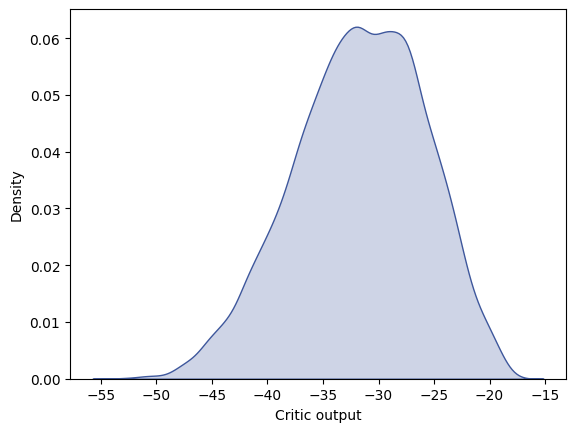

In [5]:
# sns.set_style("whitegrid")  # You can change the style to your preference
sns.kdeplot(disc_pred[:,0,0], shade=True, color="#3E579C")
# plt.title("Kernel Density Estimation (KDE) Plot")
plt.xlabel("Critic output")
plt.ylabel("Density")
plt.show()

In [6]:
percentiles = np.arange(0,100,10)
pred_p = np.percentile(disc_pred[:,0,0], percentiles)
min = np.min(disc_pred[:,0,0])
max = np.max(disc_pred[:,0,0])
limits = [0] * 10
limits[-1] = max
limits[0:-1] = pred_p

In [7]:
print(pred_p)
print(limits)

[-53.20246506 -39.73767052 -36.84259796 -34.78405075 -33.07687225
 -31.4878521  -29.80902138 -28.17908401 -26.52502785 -24.2590229 ]
[-53.20246505737305, -39.737670516967775, -36.84259796142578, -34.78405075073242, -33.07687225341797, -31.487852096557617, -29.80902137756348, -28.179084014892577, -26.52502784729004, -24.259022903442382, -17.69317626953125]


In [8]:

p_10 = inputs[(disc_pred[:,0,0] > limits[0]) & (disc_pred[:,0,0] < limits[1]),:]
p_20 = inputs[(disc_pred[:,0,0] > limits[1]) & (disc_pred[:,0,0] < limits[2]),:]
p_30 = inputs[(disc_pred[:,0,0] > limits[2]) & (disc_pred[:,0,0] < limits[3]),:]
p_40 = inputs[(disc_pred[:,0,0] > limits[3]) & (disc_pred[:,0,0] < limits[4]),:]
p_50 = inputs[(disc_pred[:,0,0] > limits[4]) & (disc_pred[:,0,0] < limits[5]),:]
p_60 = inputs[(disc_pred[:,0,0] > limits[5]) & (disc_pred[:,0,0] < limits[6]),:]
p_70 = inputs[(disc_pred[:,0,0] > limits[6]) & (disc_pred[:,0,0] < limits[7]),:]
p_80 = inputs[(disc_pred[:,0,0] > limits[7]) & (disc_pred[:,0,0] < limits[8]),:]
p_90 = inputs[(disc_pred[:,0,0] > limits[8]) & (disc_pred[:,0,0] < limits[9]),:]
p_100 = inputs[(disc_pred[:,0,0] > limits[9]) & (disc_pred[:,0,0] < limits[10]),:]


[0.00010661]


[0.00011597 0.00013599 0.00015805 0.00018304 0.00021176 0.00024469
 0.00028159 0.00032143 0.00036236 0.00040206 0.00043823 0.00046923
 0.0004947  0.00051599 0.00053638 0.00056094 0.0005961  0.00064887
 0.00072596 0.00083276 0.00097246 0.00114545 0.00134911 0.0015782
 0.00182574 0.00208446 0.00234851 0.00261508 0.00288546 0.00316516
 0.00346283 0.00378814 0.00414899 0.00454895 0.00498573 0.00545127
 0.00593354 0.00641955 0.00689851 0.00736411 0.00781526 0.00825536
 0.00869082 0.00912982 0.00958182 0.01005781 0.01057058 0.01113408
 0.01176138 0.01246159 0.01323668 0.0140796  0.0149747  0.01590059
 0.01683468 0.01775807 0.01865894 0.01953374 0.02038575 0.02122205
 0.02205039 0.02287705 0.02370657 0.02454283 0.02539055 0.02625625]
[-53.10136366 -52.89727646 -52.69318926 -52.48910206 -52.28501486
 -52.08092765 -51.87684045 -51.67275325 -51.46866605 -51.26457884
 -51.06049164 -50.85640444 -50.65231724 -50.44823003 -50.24414283
 -50.04005563 -49.83596843 -49.63188122 -49.42779402 -49.22370682

/tmp/ipykernel_40969/747367431.py:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(disc_pred[:,0,0], shade=False, color="#3E579C")


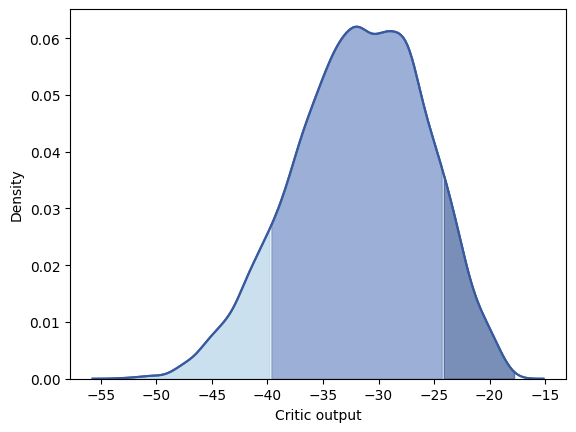

In [9]:
# sns.set_style("whitegrid")  # You can change the style to your preference
kde = gaussian_kde(disc_pred[:,0,0])


colours = ["#A8CCE3","#98B5D9","#89A0CF", "#799AC5", "#6A88BB", "#5B78B0","#4C67A6", "#3E579C","#2F4792","#204587","black"]
print(kde.evaluate(limits[0]))
x_kde, y_kde = sns.kdeplot(disc_pred[:,0,0]).get_lines()[0].get_data()

for i in range(10):
	if i in range(1,9):
		y = y_kde[(x_kde >= limits[1]) & (x_kde <= limits[9])]
		x = x_kde[(x_kde >= limits[1]) & (x_kde <= limits[9])]
		print(y)
		print(x)
		plt.fill_between(x,y, color=colours[2], alpha=0.2)
		continue
	[y1] = kde.evaluate(limits[i])
	[y2] = kde.evaluate(limits[i+1])
	y = y_kde[(x_kde >= limits[i]) & (x_kde <= limits[i+1])]
	x = x_kde[(x_kde >= limits[i]) & (x_kde <= limits[i+1])]
	print(y)
	print(x)
	plt.fill_between(x,y, color=colours[i], alpha=0.6)
	line1_x = limits[i]
	line2_x = limits[i+1]
	print(y1,y2)
	y2 = np.maximum(y1,y2)
	y1 = np.minimum(y1,y2)
	# plt.fill_betweenx([0,y2], line1_x, x2=line2_x, color=colours[i], alpha=0.6)
	# plt.plot([limits[i],limits[i]],[0,y1],color=colours[i],fill=True)


# [y_max] = kde.evaluate(np.mean(disc_pred[:,0,0]))


# plt.fill_betweenx(y_kde, x_kde, color='orange', alpha=0.4, label='Opposite Area')
# 
sns.kdeplot(disc_pred[:,0,0], shade=False, color="#3E579C")
# plt.title("Kernel Density Estimation (KDE) Plot")
plt.xlabel("Critic output")
plt.ylabel("Density")
plt.show()

In [10]:
print(p_10.shape)
print(p_100.shape)

(1592, 6)
(1592, 6)


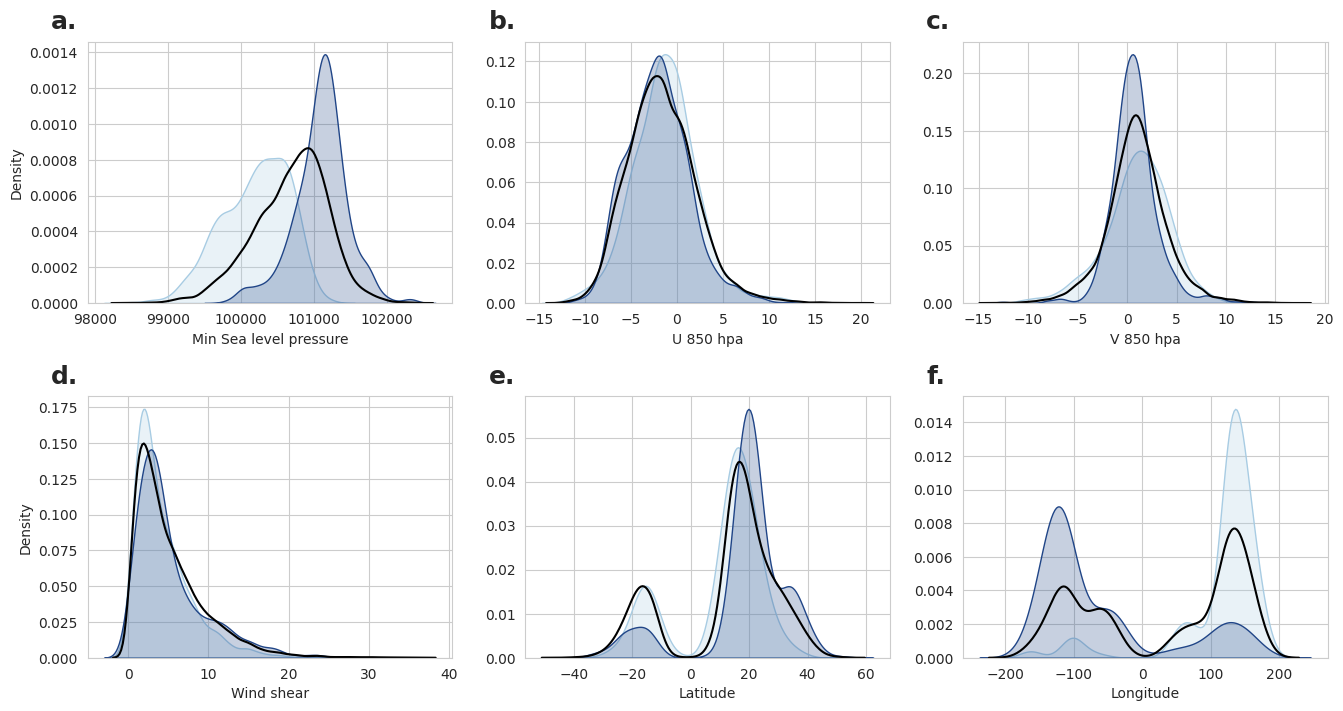

In [11]:
sns.set_style("whitegrid")  # You can change the style to your preference
height_ratios = [1,0.08,1]
fig, axes = plt.subplots(3, 3, figsize=(16, 8),gridspec_kw={'height_ratios': height_ratios})
titles = ['Min Sea level pressure', 'U 850 hpa', 'V 850 hpa', 'Wind shear', 'Latitude', 'Longitude']
labels = ['a.','b.','c.','d.','e.','f.']

for i in range(6):
    row, col = divmod(i, 3)
    
    if row == 1:
        # axes[row,col].set_facecolor('white')
        # axes[row,col] = 'off'
        axes[row,col].set_axis_off()
        row = 2
    sns.kdeplot(p_10[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(p_20[:,i], fill=True, color="#98B5D9", ax=axes[row,col])
    # sns.kdeplot(p_30[:,i], fill=True, color="#89A0CF", ax=axes[row,col])
    # sns.kdeplot(p_40[:,i], fill=True, color="#799AC5", ax=axes[row,col])
    # sns.kdeplot(p_50[:,i], fill=True, color="#6A88BB", ax=axes[row,col])
    # sns.kdeplot(p_60[:,i], fill=True, color="#5B78B0", ax=axes[row,col])
    # sns.kdeplot(p_70[:,i], fill=True, color="#4C67A6", ax=axes[row,col])
    # sns.kdeplot(p_80[:,i], fill=True, color="#3E579C", ax=axes[row,col])
    # sns.kdeplot(p_90[:,i], fill=True, color="#2F4792", ax=axes[row,col])
    sns.kdeplot(p_100[:,i], fill=True, color="#204587", ax=axes[row,col])
    sns.kdeplot(inputs[:,i],fill=False, color="Black", ax=axes[row,col])
    axes[row,col].text(-0.1, 1.05, labels[i], transform=axes[row,col].transAxes, size=18, weight='bold')
    # axes[row,col].set_title(titles[i])
    axes[row,col].set_xlabel(titles[i])
    axes[row,col].set_ylabel("")
    
axes[0,0].set_ylabel('Density')
axes[2,0].set_ylabel('Density')
# plt.title("Kernel Density Estimation (KDE) Plot")
# plt.xlabel("Values")
# plt.ylabel("Density")
# plt.show()
plt.savefig('figure_9a_inputs_3.png',bbox_inches='tight',dpi=600)

In [12]:
pred_10 = gen_pred[(disc_pred[:,0,0] > limits[0]) & (disc_pred[:,0,0] < limits[1]),:,:]
pred_100 = gen_pred[(disc_pred[:,0,0] > limits[9]) & (disc_pred[:,0,0] < limits[10]),:,:]

In [13]:
sns.set_style("white")
height_ratios = [1,0.01,1]
n = 3
m = 6
fig, axes = plt.subplots(n, m, figsize=(2*m + 0.5, 2*n), sharey=True,gridspec_kw={'height_ratios': height_ratios})


pal = sns.cubehelix_palette(10, rot=-.25, light=.7,as_cmap=True)

for i in range(m):
	for j in range(n):
		if j == 1:
			axes[j,i].set_axis_off()
			continue
		axes[j,i].set(xticklabels=[])
		axes[j,i].set(yticklabels=[])
		axes[j,i].spines['right'].set_color('#A9A9A9')  # Right spine color
		axes[j,i].spines['right'].set_linewidth(1) 
		axes[j,i].spines['left'].set_color('#A9A9A9')  # left spine color
		axes[j,i].spines['left'].set_linewidth(1)
		axes[j,i].spines['top'].set_color('#A9A9A9')  # top spine color
		axes[j,i].spines['top'].set_linewidth(1) 
		axes[j,i].spines['bottom'].set_color('#A9A9A9')  # bottom spine color
		axes[j,i].spines['bottom'].set_linewidth(1) 

		# axes[j,0].spines['bottom'].set_visible(False)
		# axes[j,0].spines['top'].set_visible(False)
		# axes[j,0].spines['left'].set_visible(False)
		# axes[j,0].spines['right'].set_visible(False)
		# axes[j,-1].spines['bottom'].set_visible(False)
		# axes[j,-1].spines['top'].set_visible(False)
		# axes[j,-1].spines['left'].set_visible(False)
		# axes[j,-1].spines['right'].set_visible(False)

# define cmap
precip_cmap,precip_norm = make_cmap()
norm = precip_norm

axes[0,0].text(-0.1, 1.05, 'a.', transform=axes[0,0].transAxes, size=16, weight='bold')
axes[2,0].text(-0.1, 1.05, 'b.', transform=axes[2,0].transAxes, size=16, weight='bold')

storms = np.random.randint(0,1000,6)
print(storms)
	
im = axes[0,0].imshow(pred_10[storms[0],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,0].invert_yaxis()
axes[0,1].imshow(pred_10[storms[1],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,1].invert_yaxis()
axes[0,2].imshow(pred_10[storms[2],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,2].invert_yaxis()
axes[0,3].imshow(pred_10[storms[3],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,3].invert_yaxis()
axes[0,4].imshow(pred_10[storms[4],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,4].invert_yaxis()
axes[0,5].imshow(pred_10[storms[5],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,5].invert_yaxis()

axes[2,0].imshow(pred_100[storms[0],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,0].invert_yaxis()
axes[2,1].imshow(pred_100[storms[1],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,1].invert_yaxis()
axes[2,2].imshow(pred_100[storms[2],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,2].invert_yaxis()
axes[2,3].imshow(pred_100[storms[3],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,3].invert_yaxis()
axes[2,4].imshow(pred_100[storms[4],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,4].invert_yaxis()
axes[2,5].imshow(pred_100[storms[5],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,5].invert_yaxis()





fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
# cbar_ax = fig.add_axes([1, 0.031, 0.03, 0.936])
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
# cbar_ax = fig.add_axes([0, -0.1, 1, 0.02])
levels=[0, 1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 70, 100, 150]
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.01,ticks=levels)
cb.ax.tick_params(labelsize=12)
cb.set_label('mm / 3hr', fontsize=16)
fig.tight_layout()

plt.savefig('figure_9b_examples_3.png',bbox_inches='tight',dpi=600)
plt.clf()


[991 714 983 361 886 567]


/tmp/ipykernel_40969/2422448490.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 1250x600 with 0 Axes>

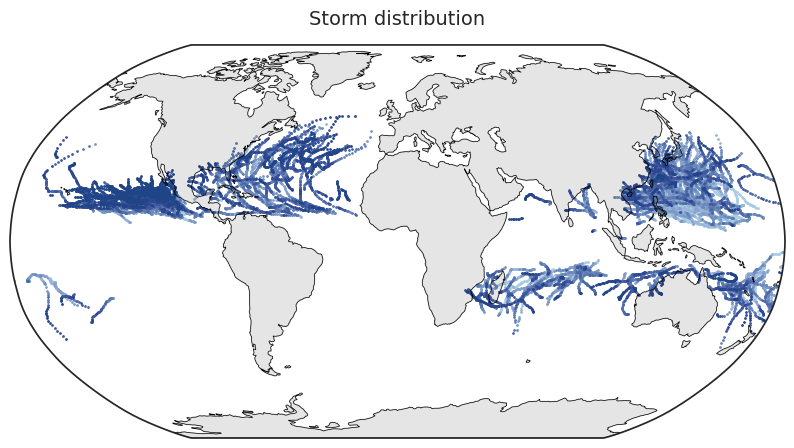

In [14]:
levels = [10, 15, 20, 25, 30, 40, 50,75, 100,140,180,200,250,300]
sns.set_style("white")
sns.set_context("notebook")
vmin=-2
vmax=2


fig, ax = plt.subplots(figsize=(10, 20),subplot_kw={'projection': ccrs.Robinson()})

# ax.set_xlim([-180, 180])
# ax.set_ylim([-90, 90])

ax.scatter(p_10[:,5],p_10[:,4], color="#A8CCE3",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_20[:,5],p_20[:,4], color="#98B5D9",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_30[:,5],p_30[:,4], color="#89A0CF",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_40[:,5],p_40[:,4], color="#799AC5",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_50[:,5],p_50[:,4], color="#6A88BB",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_60[:,5],p_60[:,4], color="#5B78B0",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_70[:,5],p_70[:,4], color="#4C67A6",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_80[:,5],p_80[:,4], color="#3E579C",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_90[:,5],p_90[:,4], color="#2F4792",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_100[:,5],p_100[:,4], color="#204587",s=1,transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)


# plt.contourf(storm.precipitation[0,:,:,0],storm.storm_lats[0,:,:],storm.storm_lons[0,:,:])


# ax.outline_patch.set_linewidth(0.5)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
# 			linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlabel_style = {'size': 14}
# gl.ylabel_style = {'size': 14}

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


ax.set_title('Storm distribution',fontsize=14,pad=15)
ax.set_global()
plt.savefig('figure_9c_storm_distribution_3.png')

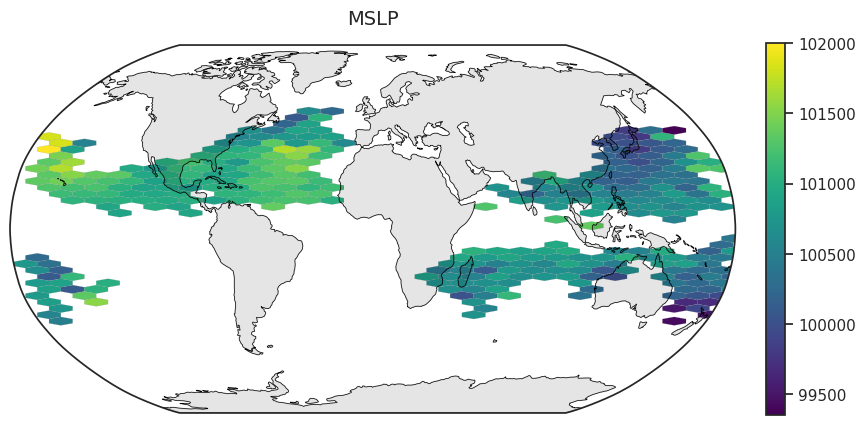

In [15]:
levels = [10, 15, 20, 25, 30, 40, 50,75, 100,140,180,200,250,300]
sns.set_style("white")
sns.set_context("notebook")
vmin=-2
vmax=2
width_ratios = [1,0.1]
fig, ax = plt.subplots(figsize=(10, 20),subplot_kw={'projection': ccrs.Robinson()})
# ax[1].set_axis_off()
# ax.contourf(inputs[:,5],inputs[:,4],inputs[:,0],levels=range(98000,102000,500000), transform=ccrs.PlateCarree(),cmap='Oranges')
# im = ax.pcolormesh(inputs[:,5],inputs[:,4],inputs[:,0], cmap='viridis', transform=ccrs.PlateCarree())
x = inputs[:,5]
y = inputs[:,4]
z = inputs[:,0]
m = ax.hexbin(x,y, C=z, gridsize=30, cmap='viridis', mincnt=1, edgecolor='gray', reduce_C_function=np.mean,linewidth=0.1, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
# 			linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlabel_style = {'size': 14}
# gl.ylabel_style = {'size': 14}

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


ax.set_title('MSLP',fontsize=14,pad=15)
ax.set_global()
# cbar_ax = fig.add_axes([1, 0.031, 0.03, 0.936])
# levels=[0, 1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 70, 100, 150]

cb = plt.colorbar(m,fraction=0.024, pad=0.04)

plt.savefig('figure_9d_mslp_distribution_3.png')

In [17]:
print(gen_pred.shape)
print(real.shape)

(15930, 100, 100, 20)
(15930, 100, 100, 1)


In [21]:
y_pred = gen_pred[0:16,:,:,0:1]
y_true = real[0:16,:,:,:]

In [22]:
print(y_pred.shape)
print(y_true.shape)

(16, 100, 100, 1)
(16, 100, 100, 1)


In [23]:
wloss = np.mean(y_true * y_pred, axis=-1)

In [25]:
print(wloss.shape)

(16, 100, 100)


In [64]:
print(y_max.shape)

(16, 100, 100)


In [189]:
y_max = np.max(y_true,axis=-1) + 0.1 # gamma 
image_relevance_weighting = y_true[:,:,:,0] / y_max # Wsod / gamma to get values bwteen 0 and 1
image_relevance_weighting = np.power(y_true[:,:,:,0],2) # because we are normalising by the max for demonstration then this is actually not giving higher values
image_relevance_weighting = y_true[:,:,:,0]
# weight_avg = K.ones((y_true.shape)) # Wavg is a matrix of ones because we don't want 0 weight on everything
weight_avg = np.ones_like(y_true[:,:,:,0])
weight_avg_2 = np.mean(y_true[:,:,:,0]) # this is to remove low distance bias over drizzle and no rain - so that even images will small rain are seen as the same as other images
weight = weight_avg + image_relevance_weighting
# weight = weight[:,:,:,0]
# sigma = np.sum(weight)
wloss = np.mean(y_true * y_pred, axis=-1)
# wloss_max = np.max(y_true * y_pred, axis=-1)
wwloss = wloss * weight + weight_avg_2
wloss_norm = wloss[0,:,:] * 1/np.max(wloss[0,:,:])
wwloss_norm = wwloss[0,:,:] * 1/np.max(wwloss[0,:,:])

wloss = wloss[0,:,:]
wwloss = wwloss[0,:,:]



In [190]:
print(image_relevance_weighting.shape)
print(weight_avg.shape)
print(weight.shape)
print(y_max[0,:,:])
print(np.max(weight[0,:,:]))
print(np.max(wloss))
print(np.max(wwloss))

print(np.mean(wloss))
print(np.mean(wwloss))

print(np.std(wloss_norm))
print(np.std(wwloss_norm))


(16, 100, 100)
(16, 100, 100)
(16, 100, 100)
[[0.1        0.1        0.1        ... 0.1625     0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1625     0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1625     0.1        0.1       ]
 ...
 [0.66250001 0.66250001 0.66250001 ... 0.1625     0.1        0.1       ]
 [0.85000004 0.7875     0.7875     ... 0.1        0.1        0.1       ]
 [0.85000004 0.7875     0.7875     ... 0.1        0.1        0.1       ]]
22.125002208243583
592.7025322354247
12040.222127340909
5.455213118428088
46.97067521664228
0.03711956777671651
0.030298939201533027


In [191]:
sns.set_style("white")
height_ratios = [1,0.1]
n = 2
m = 5
fig, axes = plt.subplots(n, m, figsize=(2*m + 0.1, 2*n), sharey=True,gridspec_kw={'height_ratios': height_ratios})


pal = sns.cubehelix_palette(10, rot=-.25, light=.7,as_cmap=True)

for i in range(m):
	for j in range(n):
		if j == 1:
			axes[j,i].set_axis_off()
			continue
		axes[j,i].set(xticklabels=[])
		axes[j,i].set(yticklabels=[])
		axes[j,i].spines['right'].set_color('#A9A9A9')  # Right spine color
		axes[j,i].spines['right'].set_linewidth(1) 
		axes[j,i].spines['left'].set_color('#A9A9A9')  # left spine color
		axes[j,i].spines['left'].set_linewidth(1)
		axes[j,i].spines['top'].set_color('#A9A9A9')  # top spine color
		axes[j,i].spines['top'].set_linewidth(1) 
		axes[j,i].spines['bottom'].set_color('#A9A9A9')  # bottom spine color
		axes[j,i].spines['bottom'].set_linewidth(1) 

# define cmap
precip_cmap,precip_norm = make_cmap()
norm = precip_norm

axes[0,0].text(-0.1, 1.05, 'a.', transform=axes[0,0].transAxes, size=16, weight='bold')
# axes[2,0].text(-0.1, 1.05, 'b.', transform=axes[2,0].transAxes, size=16, weight='bold')

# Define a colormap (you can choose a different one if you prefer)
cmap = plt.get_cmap('BuPu')

# Create a normalization instance for the colormap
norm2 = mcolors.Normalize(vmin=0, vmax=1)
norm2 = mcolors.PowerNorm(vmin=0, vmax=np.max(wloss), gamma = 1/6)
norm3 = mcolors.PowerNorm(vmin=0, vmax=np.max(wwloss), gamma = 1/6)


im = axes[0,0].imshow(y_true[0,:,:], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,0].invert_yaxis()
axes[0,1].imshow(y_pred[0,:,:], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,1].invert_yaxis()
axes[0,2].imshow(wloss, interpolation='nearest', norm=norm2,extent=None,cmap=cmap)
axes[0,2].invert_yaxis()
axes[0,3].imshow(weight[0,:,:], interpolation='nearest', norm=mcolors.Normalize(vmin=1, vmax=2),extent=None,cmap='RdPu')
axes[0,3].invert_yaxis()
axes[0,4].imshow(wwloss, interpolation='nearest',norm=norm3,extent=None,cmap=cmap)
axes[0,4].invert_yaxis()
# axes[0,5].imshow(pred_10[storms[5],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
# axes[0,5].invert_yaxis()




fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
# cbar_ax = fig.add_axes([1, 0.031, 0.03, 0.936])
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
# cbar_ax = fig.add_axes([0, -0.1, 1, 0.02])
levels=[0, 1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 70, 100, 150]
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.01,ticks=levels)
cb.ax.tick_params(labelsize=12)
cb.set_label('mm / 3hr', fontsize=16)
fig.tight_layout()

plt.savefig('figure_9f_wloss_3.png',bbox_inches='tight',dpi=600)
plt.clf()

/tmp/ipykernel_40969/3457720115.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 1010x400 with 0 Axes>

In [192]:
sorting = np.argsort(np.ravel(y_true[0,:,:]))
rain_sort = np.ravel(y_true)[sorting]
weightt = weight[0,:,:]
weight_sort = np.ravel(weightt)[sorting]
wloss_sort = np.ravel(wloss)[sorting]
wwloss_sort = np.ravel(wwloss)[sorting]

In [193]:
print(sorting)

[  35 5700 5701 ... 5090 5091 5092]


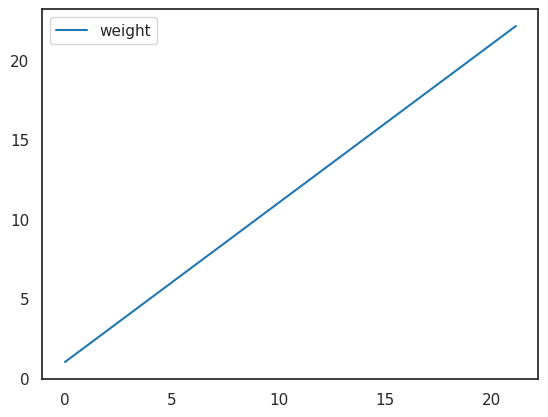

In [195]:
plt.plot(rain_sort,weight_sort)
# plt.plot(rain_sort,wloss_sort)
# plt.plot(rain_sort,wwloss_sort)
plt.legend(['weight','wloss','wwloss'])
# plt.yscale('log')
plt.show()